<a href="https://colab.research.google.com/github/gauravkedia/lstm_stockprediction/blob/main/recurrent_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as web
import datetime as dt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,LSTM

In [2]:
company='MARUTI.NS'
start=dt.datetime(2012,1,1)
end=dt.datetime(2020,1,1)
data=web.DataReader(company,'yahoo',start,end)


In [3]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data =scaler.fit_transform(data['Close'].values.reshape(-1,1))



In [4]:
prediction_days=60

In [5]:
x_train=[]
y_train=[]



In [6]:
for x in range(prediction_days,len(scaled_data)):
  x_train.append(scaled_data[x-prediction_days:x,0])
  y_train.append(scaled_data[x,0])

In [7]:
x_train,y_train=np.array(x_train),np.array(y_train)
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))


In [8]:
model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=25,batch_size=32)




Epoch 1/25
60/60 [==============================] - 11s 13ms/step - loss: 0.0494
Epoch 2/25
60/60 [==============================] - 1s 13ms/step - loss: 0.0043
Epoch 3/25
60/60 [==============================] - 1s 13ms/step - loss: 0.0032
Epoch 4/25
60/60 [==============================] - 1s 13ms/step - loss: 0.0033
Epoch 5/25
60/60 [==============================] - 1s 13ms/step - loss: 0.0036
Epoch 6/25
60/60 [==============================] - 1s 13ms/step - loss: 0.0030
Epoch 7/25
60/60 [==============================] - 1s 13ms/step - loss: 0.0030
Epoch 8/25
60/60 [==============================] - 1s 13ms/step - loss: 0.0025
Epoch 9/25
60/60 [==============================] - 1s 13ms/step - loss: 0.0042
Epoch 10/25
60/60 [==============================] - 1s 13ms/step - loss: 0.0030
Epoch 11/25
60/60 [==============================] - 1s 13ms/step - loss: 0.0023
Epoch 12/25
60/60 [==============================] - 1s 13ms/step - loss: 0.0025
Epoch 13/25
60/60 [=================

In [9]:
test_start=dt.datetime(2020,1,1)
test_end=dt.datetime.now()
test_data=web.DataReader(company,'yahoo',test_start,test_end)
actual_prices=test_data['Close'].values
total_dataset=pd.concat((data['Close'],test_data['Close']),axis=0)
model_inputs=total_dataset[len(total_dataset)-len(test_data)-prediction_days:].values
model_inputs=model_inputs.reshape(-1,1)
model_inputs=scaler.transform(model_inputs)



In [10]:
x_test=[]


In [11]:
for x in range(prediction_days,len(model_inputs)):
  x_test.append(model_inputs[x-prediction_days:x,0])
x_test=np.array(x_test)
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))




In [12]:
predicted_prices=model.predict(x_test)
predicted_prices=scaler.inverse_transform(predicted_prices)


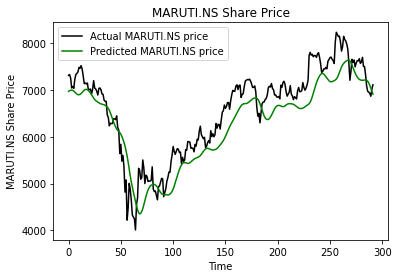

In [13]:
plt.plot(actual_prices,color="black",label=f"Actual {company} price")
plt.plot(predicted_prices,color='green',label=f"Predicted {company} price")
plt.title(f"{company} Share Price")
plt.xlabel('Time')
plt.ylabel(f'{company} Share Price')
plt.legend()
plt.show()




In [14]:
real_data=[model_inputs[len(model_inputs)+1-prediction_days:len(model_inputs + 1),0]]
real_data=np.array(real_data)
real_data=np.reshape(real_data,(real_data.shape[0],real_data.shape[1],1))

In [15]:
prediction=model.predict(real_data)
prediction=scaler.inverse_transform(prediction)
print(f"Prediction:{prediction}")

Prediction:[[6854.189]]
